# 📊 Analisis Sentimen Layanan Provider Seluler Indonesia

---

# 📌 Latar Belakang

Dalam era digital saat ini, media sosial telah menjadi sarana utama bagi masyarakat untuk menyuarakan opini dan pengalaman mereka terhadap berbagai layanan, termasuk layanan provider seluler. Persaingan yang ketat di industri telekomunikasi dan tuntutan konsumen yang semakin tinggi mendorong penyedia layanan untuk lebih proaktif dalam memahami kepuasan dan keluhan pengguna.

Namun, banyak penyedia layanan yang belum memanfaatkan data dari media sosial secara maksimal. Padahal, data tersebut menyimpan insight yang sangat berharga terkait kualitas jaringan, pelayanan pelanggan, hingga kebijakan harga. Analisis sentimen menjadi solusi strategis untuk menggali opini publik secara cepat dan efisien, serta sebagai dasar untuk perbaikan layanan yang berkelanjutan.

---

# ❓ Rumusan Masalah

- Apa saja isu utama yang dihadapi pelanggan provider seluler berdasarkan opini di media sosial?
- Bagaimana persebaran sentimen (positif dan negatif) terhadap layanan provider tersebut?
- Apa langkah strategis yang dapat diambil perusahaan untuk memperbaiki citra dan kepuasan pelanggan?

---

# 🎯 Tujuan Analisis

1. Mengidentifikasi sentimen pelanggan terhadap layanan provider seluler melalui data dari media sosial.
2. Mengungkap isu-isu dominan seperti kualitas sinyal, kecepatan internet, harga, dan layanan pelanggan.
3. Memberikan rekomendasi strategis untuk meningkatkan persepsi publik dan loyalitas pelanggan berdasarkan hasil analisis sentimen.

---

In [106]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
nltk.download('stopwords')

import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer # TF-IDF
from nltk.tokenize import word_tokenize # tokenisasi
from nltk.corpus import stopwords # deteksi stopword

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abeandries/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Read Data

In [107]:
# Data Train
df = pd.read_csv('dataset_tweet_sentiment_cellular_service_provider.csv')
df.head()

,Id,Sentiment,Text Tweet
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan Produk Bangsa Sendiri <PROVIDER_NAME>
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDER_NAME>"
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenapa di dalam kamar sinyal 4G hilang yang 1 lagi panggilan darurat saja <URL>
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data lemot banget padahal H+ !!!!
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>


In [108]:
df_sentiment = df.groupby('Sentiment').size().reset_index(name='tweet count')
df_sentiment

,Sentiment,tweet count
0,negative,161
1,positive,139


<Axes: title={'center': 'Sentiment Distribution'}, ylabel='tweet count'>

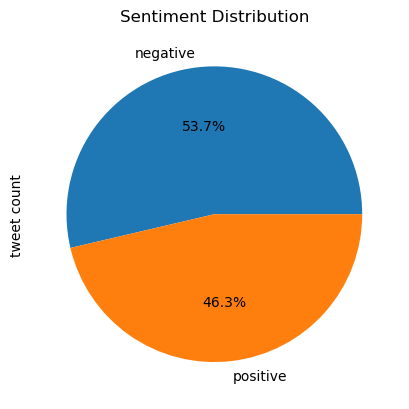

In [109]:
df_sentiment.plot(kind = 'pie', y = 'tweet count', labels = df_sentiment['Sentiment'], autopct='%1.1f%%', legend = False, title = 'Sentiment Distribution')

# Data Preprocessing

In [110]:
df['text_lower'] = df['Text Tweet'].str.lower()

In [111]:
df.head()

,Id,Sentiment,Text Tweet,text_lower
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan Produk Bangsa Sendiri <PROVIDER_NAME>,<user_mention> #boikot_<provider_name> gunakan produk bangsa sendiri <provider_name>
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDER_NAME>","saktinya balik lagi, alhamdulillah :v <provider_name>"
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenapa di dalam kamar sinyal 4G hilang yang 1 lagi panggilan darurat saja <URL>,selamat pagi <provider_name> bisa bantu kenapa di dalam kamar sinyal 4g hilang yang 1 lagi panggilan darurat saja <url>
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data lemot banget padahal H+ !!!!,dear <provider_name> akhir2 ini jaringan data lemot banget padahal h+ !!!!
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>,selamat malam pendusta <provider_name>


In [112]:
def text_cleaning(text):
    text = text.lower()
    text = text.replace('<user_mention>', '')
    text = text.replace('<provider_name>', '')
    text = text.replace('<product_name>', '')
    text = text.replace('<url>', '')
    
    text = text.replace('..', ' ')
    text = text.replace('...', ' ')
    text = text.replace('....', ' ')
    
    text = text.encode('ascii', 'replace').decode('ascii') # remove non ASCII (emoticon, chinese word, .etc)
    text = text.replace(r'\d+', "") # remove digits
    text = text.translate(str.maketrans("","",string.punctuation)) #remove punctuation
    text = text.strip() # remove whitespace from the beginning and end
    text = re.sub(r'\s+',' ', text) # remove multiple whitespace

    return text

In [113]:
df['text_clean'] = df['text_lower'].apply(lambda x: text_cleaning(x))

In [114]:
df.head()

,Id,Sentiment,Text Tweet,text_lower,text_clean
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan Produk Bangsa Sendiri <PROVIDER_NAME>,<user_mention> #boikot_<provider_name> gunakan produk bangsa sendiri <provider_name>,boikot gunakan produk bangsa sendiri
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDER_NAME>","saktinya balik lagi, alhamdulillah :v <provider_name>",saktinya balik lagi alhamdulillah v
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenapa di dalam kamar sinyal 4G hilang yang 1 lagi panggilan darurat saja <URL>,selamat pagi <provider_name> bisa bantu kenapa di dalam kamar sinyal 4g hilang yang 1 lagi panggilan darurat saja <url>,selamat pagi bisa bantu kenapa di dalam kamar sinyal 4g hilang yang 1 lagi panggilan darurat saja
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data lemot banget padahal H+ !!!!,dear <provider_name> akhir2 ini jaringan data lemot banget padahal h+ !!!!,dear akhir2 ini jaringan data lemot banget padahal h
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>,selamat malam pendusta <provider_name>,selamat malam pendusta


In [115]:
tala = pd.read_csv('StopWords_Tala.csv')
tala.head()

,LEMA
0,ada
1,adalah
2,adanya
3,adapun
4,agak


In [116]:
stopwords_tala = set(tala['LEMA'])

In [117]:
def remove_stopwords_tala(text):
    return ' '.join([i for i in text.split() if i not in stopwords_tala])

In [118]:
df['text_stopwords'] = df['text_clean'].apply(lambda x: remove_stopwords_tala(x))
df['text_stopwords'][0]

'boikot produk bangsa'

In [120]:
df.head()

,Id,Sentiment,Text Tweet,text_lower,text_clean,text_stopwords
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan Produk Bangsa Sendiri <PROVIDER_NAME>,<user_mention> #boikot_<provider_name> gunakan produk bangsa sendiri <provider_name>,boikot gunakan produk bangsa sendiri,boikot produk bangsa
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDER_NAME>","saktinya balik lagi, alhamdulillah :v <provider_name>",saktinya balik lagi alhamdulillah v,saktinya alhamdulillah v
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenapa di dalam kamar sinyal 4G hilang yang 1 lagi panggilan darurat saja <URL>,selamat pagi <provider_name> bisa bantu kenapa di dalam kamar sinyal 4g hilang yang 1 lagi panggilan darurat saja <url>,selamat pagi bisa bantu kenapa di dalam kamar sinyal 4g hilang yang 1 lagi panggilan darurat saja,pagi bantu kamar sinyal 4g hilang 1 panggilan darurat
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data lemot banget padahal H+ !!!!,dear <provider_name> akhir2 ini jaringan data lemot banget padahal h+ !!!!,dear akhir2 ini jaringan data lemot banget padahal h,akhir2 jaringan data lemot h
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>,selamat malam pendusta <provider_name>,selamat malam pendusta,malam


Insight

proses stemming tidak dilakukan karena kata `lemot` yang mana merupakan kata penting yang memiliki konteks negatif, berubah bentuk hanya menjadi `mot` sehingga kehilangan arti negatifnya dan mengurangi hasil analisis

In [121]:
def kamus(check):
    check = check.str.extractall('([a-zA_Z]+)')
    check.columns = ['check']
    b = check.reset_index(drop=True)
    check = b['check'].value_counts()

    kamus = {'kata':check.index,'freq':check.values}
    kamus = pd.DataFrame(kamus)
    kamus.index = kamus['kata']
    kamus.drop('kata', axis = 1, inplace = True)
    kamus.sort_values('freq',ascending=False,inplace=True)

    return kamus

In [123]:
kamus_unclean = kamus(df['text_stopwords'])

<Axes: ylabel='kata'>

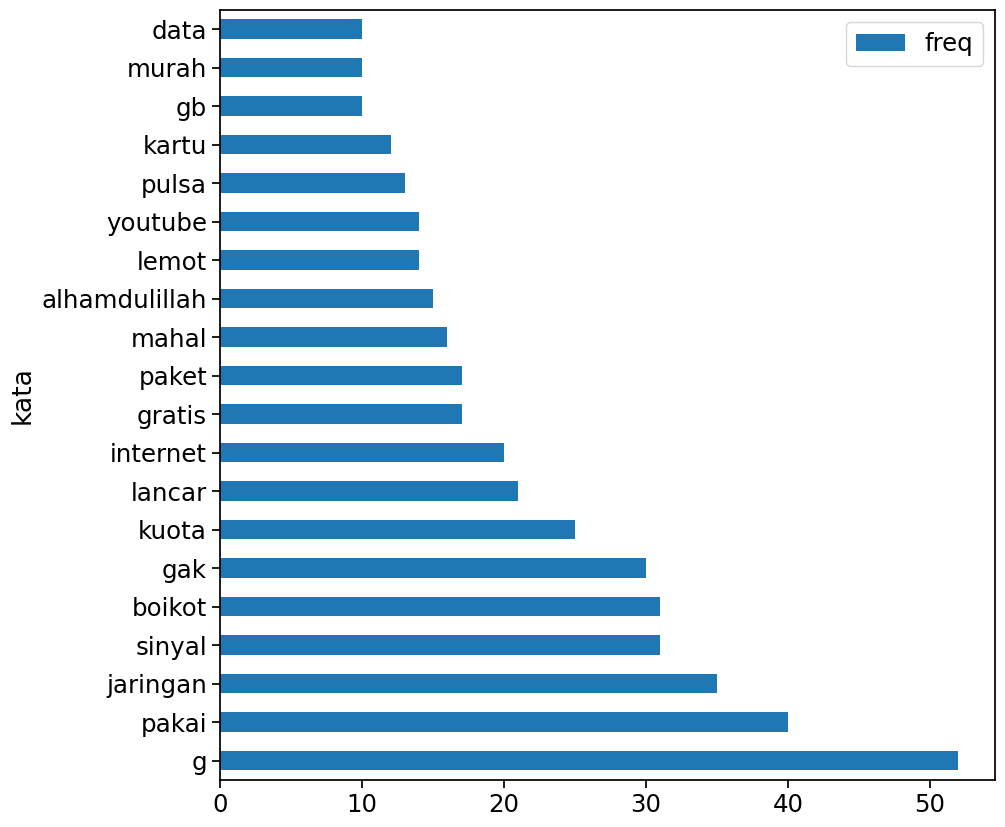

In [124]:
sns.set_context(context = 'notebook', font_scale = 1.6)
kamus_unclean[:20].plot(kind = 'barh',figsize = (10,10))

In [125]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [128]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(20, 10))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off")

In [126]:
word_cloud = WordCloud(background_color='white').generate(str(df['text_stopwords']))

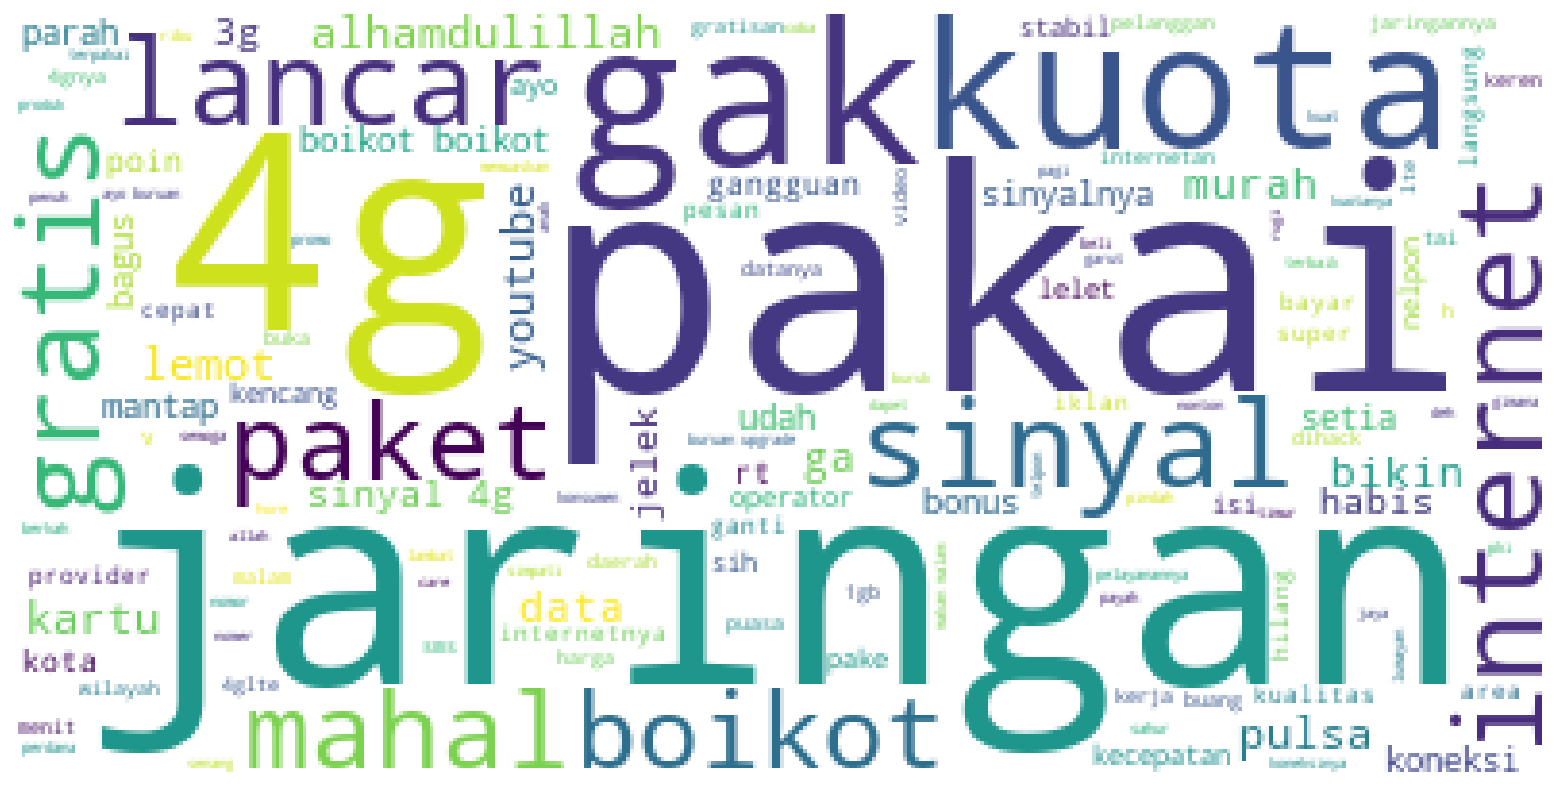

In [129]:
plot_cloud(word_cloud)

# ✅ Kesimpulan

Berdasarkan analisis terhadap tweet pengguna, ditemukan bahwa:

- **Sentimen negatif mendominasi**, yaitu sebesar **53.7%**, dibandingkan sentimen positif sebesar **46.3%**.
- Isu yang paling sering muncul meliputi:
  - **Koneksi lambat** (*lemot*)
  - **Harga mahal** (*mahal*)
  - **Sinyal hilang atau gangguan**
  - **Kuota cepat habis / tidak transparan**
- Kata-kata negatif seperti *jelek*, *parah*, dan *boikot* sering muncul, mencerminkan tingkat ketidakpuasan yang tinggi dari pelanggan.

Jika tidak ditangani, sentimen negatif ini berisiko menurunkan reputasi perusahaan dan mengurangi retensi pelanggan.

---

## 📢 Rekomendasi

1. **Infrastruktur Jaringan**  
   Meningkatkan cakupan sinyal 4G, khususnya di dalam gedung dan area rawan gangguan. Modernisasi infrastruktur jaringan agar sejalan dengan kebutuhan digital masa kini.

2. **Layanan Pelanggan**  
   Menyediakan kanal khusus untuk menangani keluhan terkait kecepatan internet dan gangguan jaringan secara responsif.

3. **Branding & Komunikasi Publik**  
   Aktif membalas kampanye boikot dengan strategi promosi berbasis kualitas dan perbaikan layanan, serta memperkuat narasi "Produk Bangsa Sendiri" dalam kampanye pemasaran.

---